# 1. Importing The Necessary libraries


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


%matplotlib inline

# 2. Importing my Data Set

In [ ]:
# I'm using this cell of code to access the data file in the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FinData.csv')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,total_acc,total_pymnt,total_rec_prncp,total_rec_int,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,loan_paid,Joint App,MORTGAGE,OWN,RENT,B,C,D,E,F,G,Source Verified,Verified,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,small_business,vacation,w
0,0,0,35000,0.1505,1214.15,110000.0,9.13,0,680,684,10,43573.779596,35000.00,8573.78,22049,9213.0,22800,46565,22049,18700,23765,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,1,4,5,4,4,2,5,6,5,7,1,80.0,0.0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,1,3,16000,0.1903,586.74,58000.0,29.05,0,670,674,34,20685.951468,16000.00,4685.95,43001,22068.0,24100,53705,43001,24100,29605,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,8,8,8,20,4,8,27,8,10,2,95.7,75.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,2,7,16000,0.2000,423.91,38400.0,31.93,0,660,664,36,21919.903154,16000.00,5919.90,52467,24451.0,46500,94156,52467,34400,47656,8.0,5.0,11.0,64.0,146.0,111,8,8,2.0,1.0,7.0,51.0,70.5,56.0,0.602,3.0,5.0,5573.0,3498.0,10161.0,0.00,2,8,10,9,9,19,13,16,10,15,4,87.9,66.7,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,3,13,5200,0.0944,166.43,115000.0,5.86,1,690,694,24,5678.094115,5200.00,478.09,75281,65426.0,28700,81495,75281,20700,50743,2.0,3.0,12.0,18.0,161.0,203,1,1,3.0,1.0,1.0,98.0,21.9,47.0,0.312,5.0,6.0,3187.0,6273.0,16164.0,0.00,5,3,5,5,6,10,9,13,5,13,7,63.6,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,4,20,9575,0.1709,341.81,73000.0,30.97,0,710,714,36,4441.910000,2191.25,1208.67,77575,75968.0,11500,125139,77575,10000,113639,14.0,1.0,3.0,30.0,262.0,250,14,3,3.0,1.0,4.0,88.0,16.1,75.0,0.140,0.0,1.0,932.0,11082.0,8393.0,1041.99,4,2,2,3,13,18,4,18,2,7,1,86.1,0.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(15848, 79)

In [ ]:
df.drop(['Unnamed: 0' , 'Unnamed: 0.1'], axis=1 , inplace=True)
df.shape

(15848, 77)

# 3. Creating a Neural Network Model


## 3.1 Split the data to Dependant and Independant

In [ ]:
df = df.copy()

X = df.loc[:, df.columns != 'loan_paid'].values
y = df.loan_paid.values

## 3.2 Split the data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(12678, 78)
(3170, 78)


## 3.3 building the model

In [ ]:

model = Sequential()
model.add(Dense(units=78,activation='relu'))
model.add(Dense(units=39,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=50,batch_size=512,validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 1s 13ms/step - loss: 0.7132 - accuracy: 0.4701 - val_loss: 0.6870 - val_accuracy: 0.7527
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6853 - accuracy: 0.7619 - val_loss: 0.6811 - val_accuracy: 0.7527
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6793 - accuracy: 0.7585 - val_loss: 0.6753 - val_accuracy: 0.7527
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6737 - accuracy: 0.7563 - val_loss: 0.6698 - val_accuracy: 0.7527
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6680 - accuracy: 0.7575 - val_loss: 0.6645 - val_accuracy: 0.7527
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6617 - accuracy: 0.7566 - val_loss: 0.6319 - val_accuracy: 0.7527
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5955 - accuracy: 0.7555 - val_loss: 0.5462 - val_accuracy: 0.7527
Epoch 8/50
25/25 [=

## 3.4 Evaluate The Model


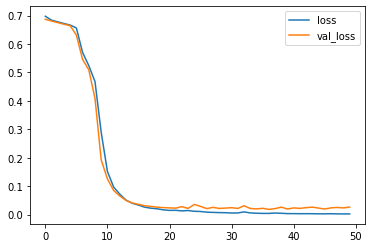

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

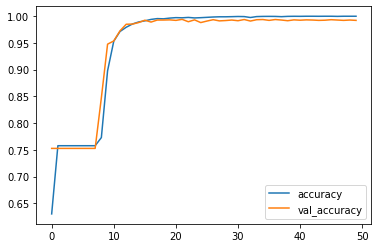

In [ ]:
losses[['accuracy','val_accuracy']].plot()


In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       784
           1       0.99      1.00      0.99      2386

    accuracy                           0.99      3170
   macro avg       0.99      0.98      0.99      3170
weighted avg       0.99      0.99      0.99      3170



In [ ]:
pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1
0,759,25
1,0,2386


# 4. simulating a new customer

In [ ]:
import random

df = df.reset_index(drop=True)

random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_paid',axis=1).iloc[random_ind]
new_customer

Unnamed: 0         9521.0000
Unnamed: 0.1      46247.0000
loan_amnt         16000.0000
int_rate              0.1602
installment         389.2600
                     ...    
moving                0.0000
other                 0.0000
small_business        0.0000
vacation              0.0000
w                     0.0000
Name: 9521, Length: 78, dtype: float64

In [ ]:
new_c = scaler.transform(new_customer.values.reshape(1,78))

print(f"model prediction: {(model.predict(new_c) > 0.5).astype('int32')[0][0]}")

model prediction: 0


In [ ]:
# checking if this customer paid his loan

df.loc[random_ind, 'loan_paid']

0

# 5. Conclusion 
#### 1. After applying the Simulation it appears that the Simulated customer wont pay the loan by 99% as my Neural Network has an accuracy of 99%.